<H1 style="text-align:center;">
Finding Patterns
</H1>
<hr style="height:5px;">

## Hierarchical clustering
<hr style="height:2px;">

As an example, we apply hierarchical clustering to the Iris data set, ignoring the
categorical attribute *`Species`*. We use the normalized Iris data set `iris.norm` that
is constructed in Sect. 6.6.2.3. We can apply hierarchical clustering after removing
the categorical attribute and can plot the dendrogram afterwards:

In [1]:
#
# NORMALIZATION
#

# using the iris data as an example
iris.norm <- iris

# for loop over each coloumn
for (i in c(1:length(iris.norm))){
    if (!is.factor(iris.norm[,i])){
        attr.mean <- mean(iris.norm[,i])
        attr.sd <- sd(iris.norm[,i])
        iris.norm[,i] <- (iris.norm[,i]-attr.mean)/attr.sd
    }
}


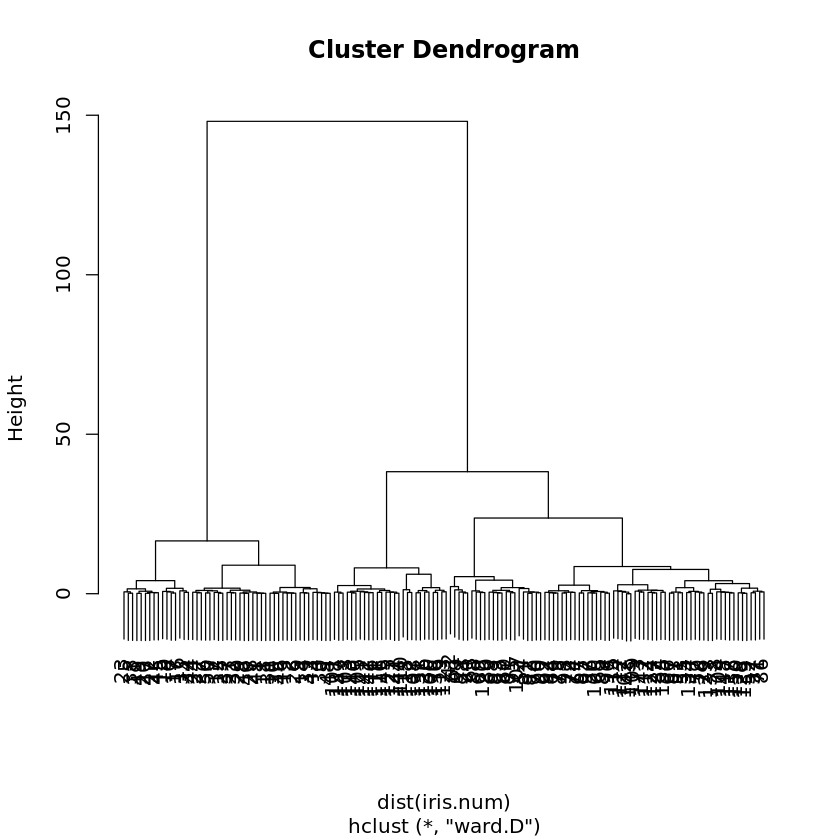

In [3]:
iris.num <- iris.norm[1:4]
iris.cl <- hclust(dist(iris.num), method="ward.D")
plot(iris.cl)

Here, the Ward method for the cluster distance aggregation function as described
in Table 7.3 was chosen. For the other cluster distance aggregation functions in the
table, one simply has to replace `ward.D` by `single` (for single linkage), by `complete`
(for complete linkage), by `average` (for average linkage), or by `centroid`.

For heatmaps, the library `gplots` is required that needs installing first:

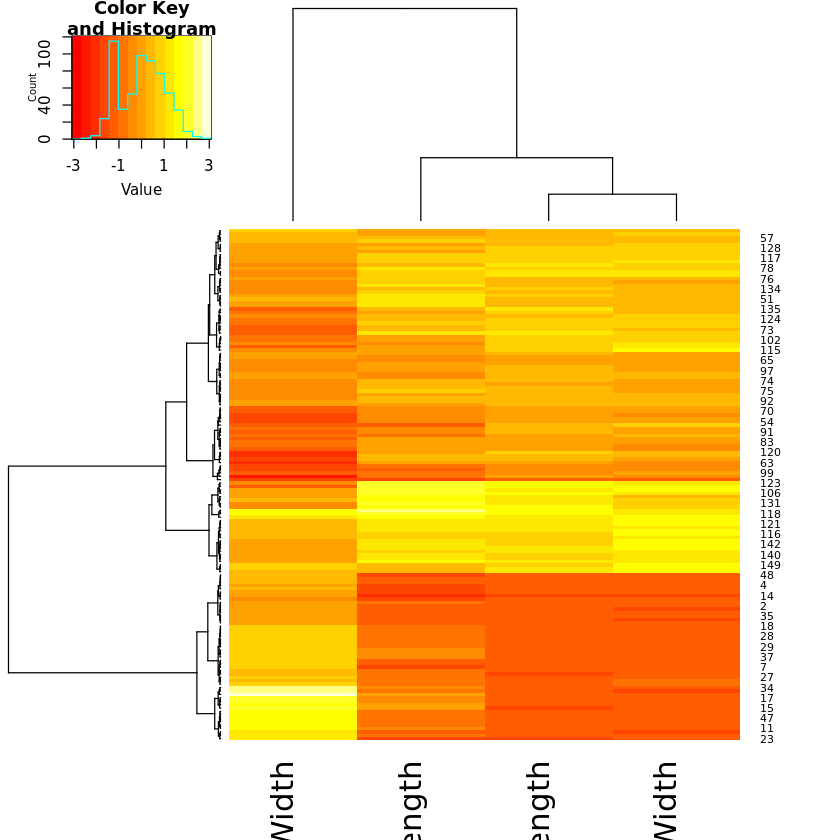

In [5]:
library(gplots)
rowv <- as.dendrogram(hclust(dist(iris.num), method="ward.D"))
colv <- as.dendrogram(hclust(dist(t(iris.num)), method="ward.D"))
heatmap.2(as.matrix(iris.num), Rowv=rowv,Colv=colv, trace="none")

## Prototype-Based Clustering
<hr style="height:2px;">

The R-function `kmeans` carries out k-means clustering.

In [6]:
iris.km <- kmeans(iris.num,centers=3)

The desired numbers of clusters is specified by the parameter `centers`. The location
of the cluster centers and the assignment of the data to the clusters is obtained
by the `print` function:

In [7]:
print(iris.km)

K-means clustering with 3 clusters of sizes 50, 53, 47

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1  -1.01119138  0.85041372   -1.3006301  -1.2507035
2  -0.05005221 -0.88042696    0.3465767   0.2805873
3   1.13217737  0.08812645    0.9928284   1.0141287

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2
 [75] 2 3 3 3 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 3 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 47.35062 44.08754 47.45019
 (between_SS / total_SS =  76.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      
